

Predicting the upcoming num_orders

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  #not much needed here as we are using .head() in most of the places
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #to make a speicified area for the specification of data shared. 
%matplotlib inline                   
#to show the output of potting command.
import seaborn as sns
from sklearn.preprocessing import StandardScaler #standardizes a feature by subtracting the mean and then scaling to unit variance
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\KIIT\\Desktop\\T&T project DATASET\\train.csv")
center=pd.read_csv("C:\\Users\\KIIT\\Desktop\\T&T project DATASET\\fulfilment_center_info.csv")
meal=pd.read_csv("C:\\Users\\KIIT\\Desktop\\T&T project DATASET\\meal_info.csv")
test=pd.read_csv("C:\\Users\\KIIT\\Desktop\\T&T project DATASET\\test.csv")

##### Data Pre-Processing

In [3]:
print("The Shape of Demand dataset :",data.shape)
print("The Shape of Fulmilment Center Information dataset :",center.shape)
print("The Shape of Meal information dataset :",meal.shape)
print("The Shape of Test dataset :",test.shape)

The Shape of Demand dataset : (456548, 9)
The Shape of Fulmilment Center Information dataset : (77, 5)
The Shape of Meal information dataset : (51, 3)
The Shape of Test dataset : (32573, 8)


In [4]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [5]:
test['num_orders']=123456 ### Assigning random number for Target Variable of Test Data.

In [6]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1028232,146,55,1885,158.11,159.11,0,0,123456
1,1127204,146,55,1993,160.11,159.11,0,0,123456
2,1212707,146,55,2539,157.14,159.14,0,0,123456
3,1082698,146,55,2631,162.02,162.02,0,0,123456
4,1400926,146,55,1248,163.93,163.93,0,0,123456


In [7]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [8]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [9]:
data=pd.concat([data,test],axis=0)

In [10]:
data=data.merge(center,on='center_id',how='left')

In [11]:
data=data.merge(meal,on='meal_id',how='left')

In [12]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [13]:
data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

##### Deriving New Features

In [14]:
#Discount Amount
data['discount amount']=data['base_price']-data['checkout_price']

In [15]:
#Discount Percent
data['discount percent'] = ((data['base_price']-data['checkout_price'])/data['base_price'])*100

In [16]:
#Discount Y/N
data['discount y/n'] = [1 if x>0 else 0 for x in (data['base_price']-data['checkout_price'])]

In [17]:
data=data.sort_values(['center_id', 'meal_id', 'week']).reset_index()

In [18]:
#Compare Week Price
data['compare_week_price'] = data['checkout_price'] - data['checkout_price'].shift(1) 

In [19]:
data['compare_week_price'][data['week']==1]=0

In [20]:
data=data.sort_values(by='index').reset_index().drop(['level_0','index'],axis=1)

In [21]:
# Compare Week Price Y/N
data['compare_week_price y/n'] = [1 if x>0 else 0 for x in data['compare_week_price']]

In [22]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount amount,discount percent,discount y/n,compare_week_price,compare_week_price y/n
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1,0.0,0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,-1.00,-0.736214,0,0.0,0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.736052,1,0.0,0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,98.03,22.405321,1,0.0,0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,-1.00,-0.412371,0,0.0,0


In [23]:
data.isnull().sum()

id                        0
week                      0
center_id                 0
meal_id                   0
checkout_price            0
base_price                0
emailer_for_promotion     0
homepage_featured         0
num_orders                0
city_code                 0
region_code               0
center_type               0
op_area                   0
category                  0
cuisine                   0
discount amount           0
discount percent          0
discount y/n              0
compare_week_price        0
compare_week_price y/n    0
dtype: int64

##### Train Test Split

In [24]:
train=data[data['week'].isin(range(1,146))]
test=data[data['week'].isin(range(146,156))]

In [25]:
print("The Shape of Train dataset :",train.shape)
print("The Shape of Test dataset :",test.shape)

The Shape of Train dataset : (456548, 20)
The Shape of Test dataset : (32573, 20)


<AxesSubplot:xlabel='week', ylabel='num_orders'>

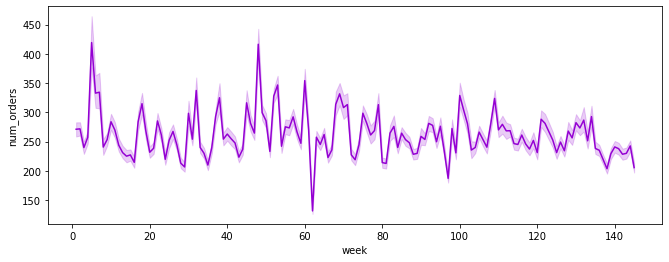

In [26]:
plt.figure(figsize=(11,4))
sns.lineplot(train['week'],train['num_orders'],color='darkviolet')

<AxesSubplot:title={'center':'Center type'}>

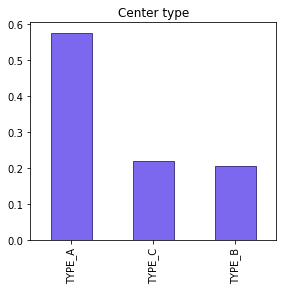

In [27]:
plt.figure(1)
plt.subplot(133) #setting up 1st fig in 3x3 fig matrix
train['center_type'].value_counts(normalize = True).plot.bar(figsize = (15,4), color=('mediumslateblue'),  edgecolor='darkslateblue', title = 'Center type')
# With normalize set to True , returns the relative frequency by dividing all values by the sum of values.

<AxesSubplot:title={'center':'Cuisine'}>

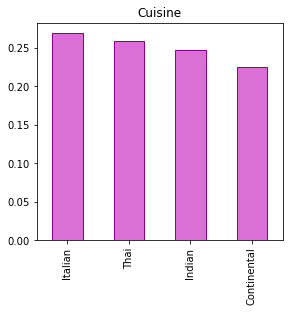

In [28]:
plt.figure(1)
plt.subplot(133)
train['cuisine'].value_counts(normalize=True).plot.bar(figsize = (15,4),color=('orchid'),  edgecolor='darkmagenta', title = "Cuisine")

<AxesSubplot:title={'center':'Category'}>

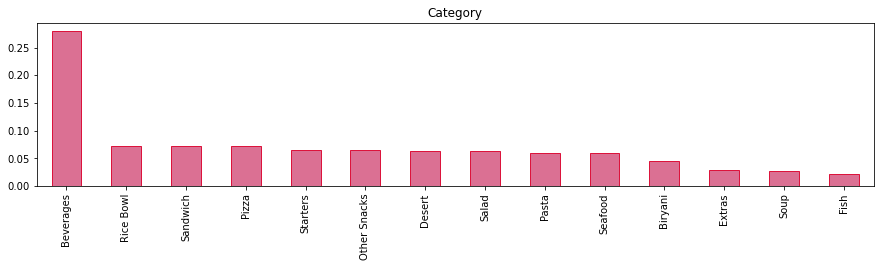

In [29]:
plt.figure(1)
plt.subplot(111)
train['category'].value_counts(normalize = True).plot.bar(figsize = (15,3),color=('palevioletred'),  edgecolor='crimson', title = 'Category')

<AxesSubplot:title={'center':'Region wise'}>

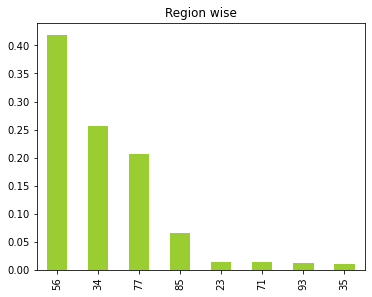

In [30]:
#Plotting distribution for Region_wise/Center wise
plt.figure(1)
plt.subplot(231)
train['region_code'].value_counts(normalize = True).plot.bar(figsize = (20,10), color='yellowgreen' ,title = 'Region wise')

<AxesSubplot:xlabel='category'>

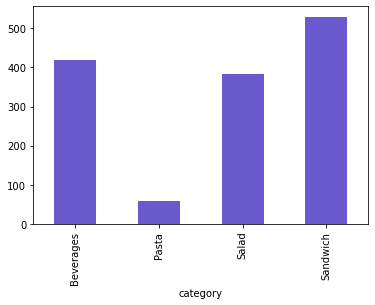

In [31]:
italian_cuisine = train[train['cuisine'] == 'Italian']
italian_cuisine.groupby('category')['num_orders'].mean().plot.bar(color= 'slateblue')

<AxesSubplot:xlabel='category'>

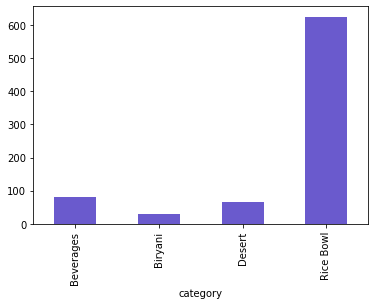

In [32]:
indian_cuisine = train[train['cuisine'] == 'Indian']
indian_cuisine.groupby('category')['num_orders'].mean().plot.bar(color='slateblue')

<AxesSubplot:xlabel='category'>

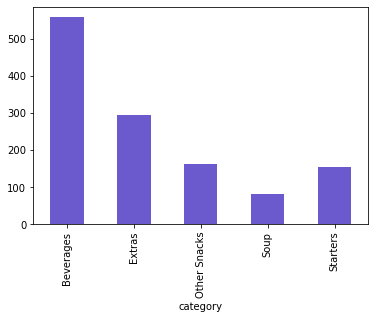

In [33]:
Thai_cuisine = train[train['cuisine'] == 'Thai']
Thai_cuisine.groupby('category')['num_orders'].mean().plot.bar(color='slateblue')

<AxesSubplot:xlabel='category'>

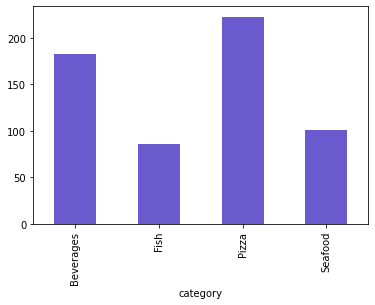

In [34]:
Continental_cuisine = train[train['cuisine'] == 'Continental']
Continental_cuisine.groupby('category')['num_orders'].mean().plot.bar(color='slateblue')

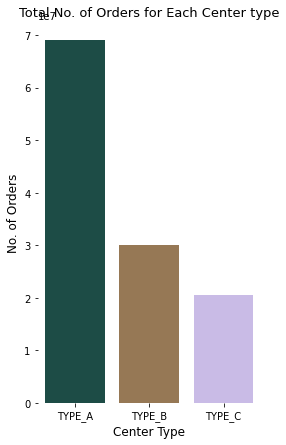

In [35]:
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Orders for Each Center type',fontdict={'fontsize':13})
sns.barplot(y='num_orders', x='center_type', data=train.groupby('center_type').sum()['num_orders'].reset_index(),palette="cubehelix");
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center Type',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


Type_A Centers have the highest number of Orders placed and Type_C has the least.

In [36]:
train['center_id'].nunique()

77

The are are 77 Fullfilment Centers in total.

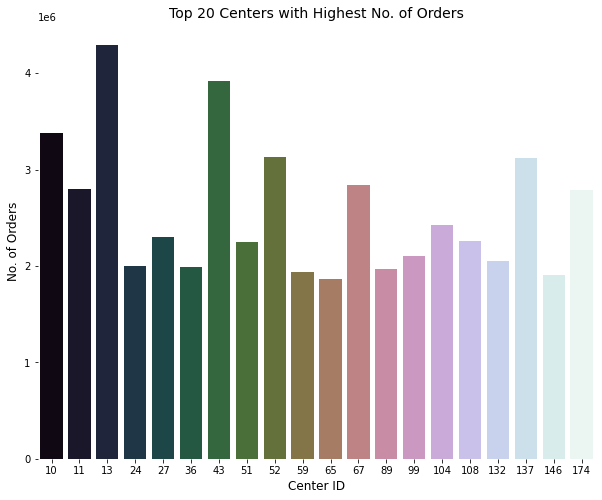

In [37]:
fig=plt.figure(figsize=(10,8))
plt.title('Top 20 Centers with Highest No. of Orders',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='center_id', data=train.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20),palette="cubehelix");
# ,order=list(train.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20)['center_id'])
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center ID',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


Initially, when we checked, which Center Type has the highest number of Orders, We found that Center Type_A has the highest number of orders, but now when we check individually, we could see that Center 13 of Type_B has the highest number of Orders. Let’s analyze the reason behind that.

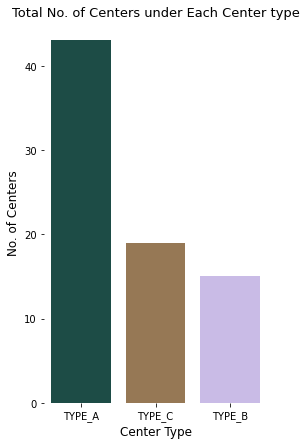

In [38]:
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Centers under Each Center type',fontdict={'fontsize':13})
sns.barplot(y=train.groupby(['center_id','center_type']).num_orders.sum().reset_index()['center_type'].value_counts(), x=train.groupby(['center_id','center_type']).num_orders.sum().reset_index()['center_type'].value_counts().index,palette="cubehelix");
plt.ylabel('No. of Centers',fontdict={'fontsize':12})
plt.xlabel('Center Type',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

Type_A has the most number of orders because, Type_A has the most number of Centers - 43 Centers.

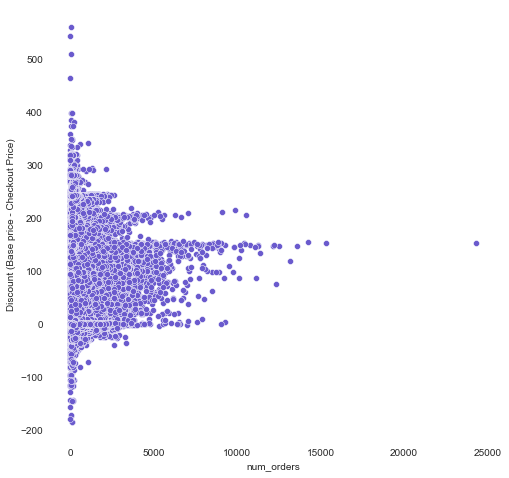

In [39]:
sns.set_style("white")
plt.figure(figsize=(8,8))
sns.scatterplot(y=train['base_price']-train['checkout_price'],x=train['num_orders'],color='slateblue')
plt.ylabel('Discount (Base price - Checkout Price)')
sns.despine(bottom = True, left = True)

We created a new feature: Discount which is the difference of base price and checkout price and tried to find out if there is any relationship between the discount and the number of orders. But surprisingly there are no good correlation between the discount and the number of orders.

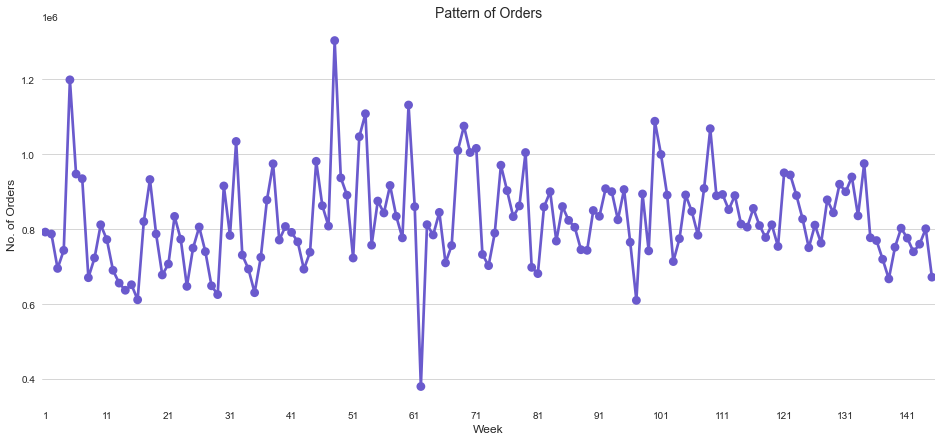

In [40]:
fig=plt.figure(figsize=(16,7))
sns.set_style("whitegrid")
plt.title('Pattern of Orders',fontdict={'fontsize':14})

sns.pointplot(x=train.groupby('week').sum().reset_index()['week'],y=train.groupby('week').sum().reset_index()['num_orders'],color='slateblue')
plt.xticks(range(0, 150, 10))
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Week',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

When we analysed the trend of order placed over the weeks, we could see that the highest number of orders were received in week 48 and the lowest in week 62.

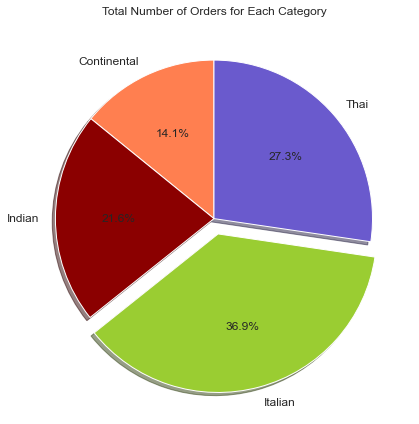

In [41]:
plt.figure(figsize=(6,6))
colors = ['coral','darkred','yellowgreen','slateblue']
plt.pie(train.groupby(['cuisine']).num_orders.sum(),
    labels=train.groupby(['cuisine']).num_orders.sum().index,
    shadow=True,
    colors=colors,
    explode=(0.00, 0.00, 0.10,0.00),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Orders for Each Category')
plt.tight_layout()
plt.show()

Italian Cuisine has the highest number of orders with Continental cuisine being the least.

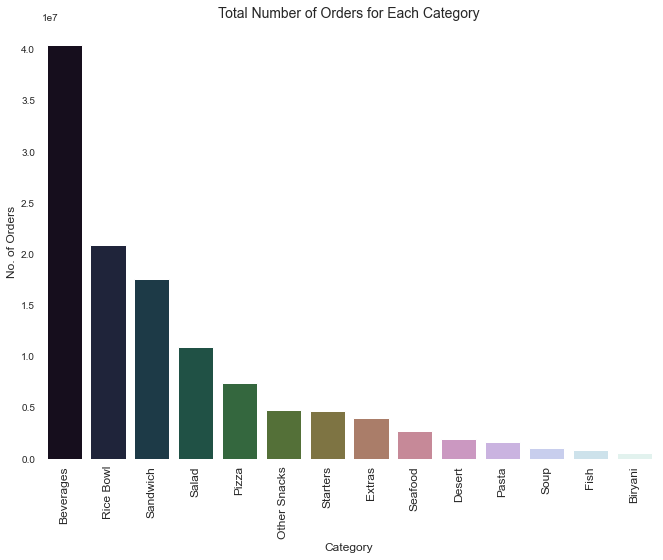

In [42]:
fig=plt.figure(figsize=(11,8))
sns.set_style("white")

plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Category',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='category', data=train.groupby('category').num_orders.sum().sort_values(ascending=False).reset_index(),palette="cubehelix");
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


We could see that Beverages are the food category which has the higest number of orders and Biriyani is the food category with least number of orders.

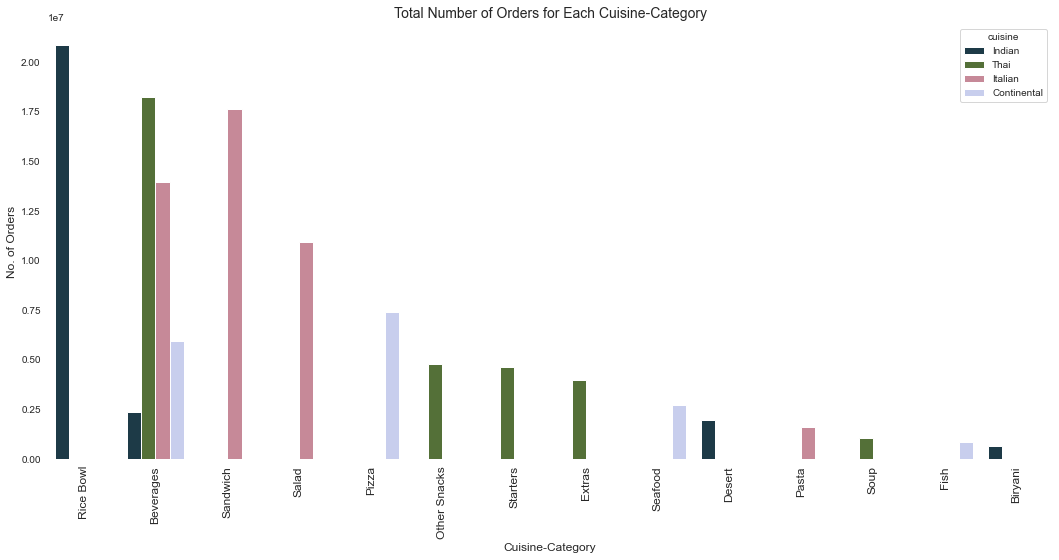

In [43]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Cuisine-Category',fontdict={'fontsize':14})

sns.barplot(x='category',y='num_orders',data=train.groupby(['cuisine','category']).sum().sort_values(by='num_orders', ascending=False).reset_index(),hue='cuisine',palette="cubehelix")

plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Cuisine-Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

Similary when we checked which specific cuisne-food category has the highest number of orders, we could see that Indian-Rice Bowl has the highest number of orders and Indian-Biriyani has the least.

In [44]:
list(data.groupby('region_code').num_orders.sum().sort_values(ascending=False).reset_index().values[:,0])

[56, 34, 77, 85, 71, 23, 93, 35]

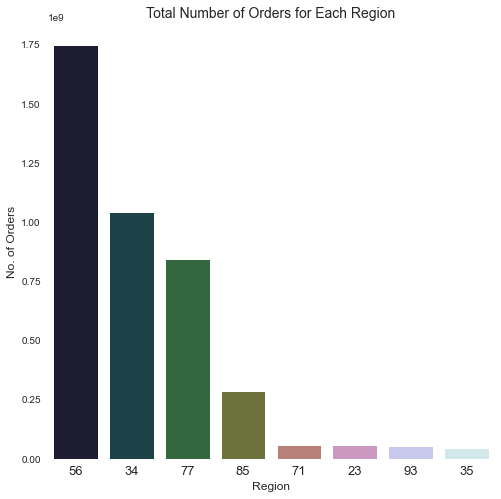

In [45]:
fig=plt.figure(figsize=(8,8))
sns.set_style("white")
plt.xticks(fontsize=13)
plt.title('Total Number of Orders for Each Region',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='region_code', data=data.groupby('region_code').num_orders.sum().sort_values(ascending=False).reset_index(),palette="cubehelix",order=list(data.groupby('region_code').num_orders.sum().sort_values(ascending=False).reset_index().values[:,0]));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Region',fontdict={'fontsize':12})
plt.xticks()
sns.despine(bottom = True, left = True);


Also when we checked the number of orders with respect to Region, we could see that Region - 56 has the highest number of orders - 60.5M orders which is almost 35M orders higher than the Region with second highest number of orders - Region 34 - 24M orders. 

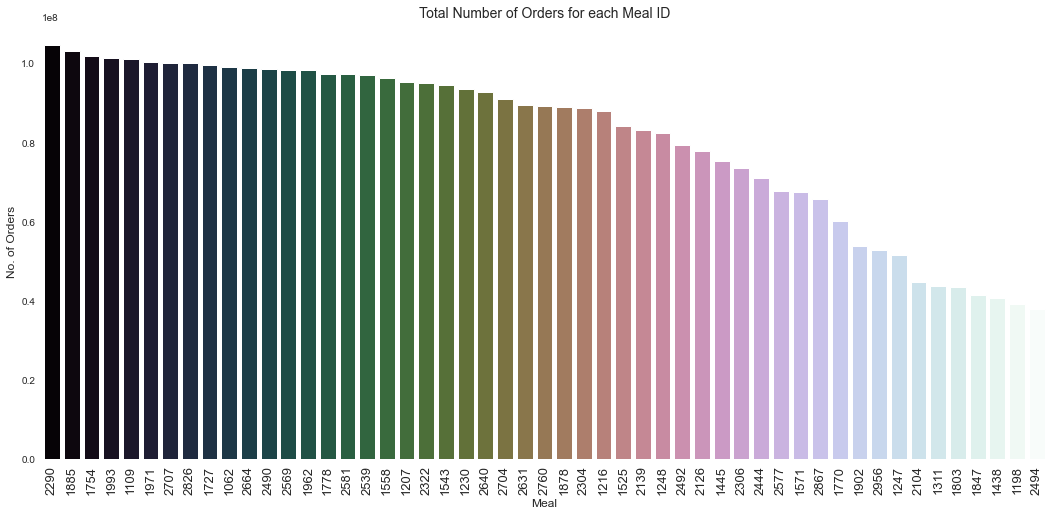

In [46]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=13)
plt.title('Total Number of Orders for each Meal ID',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='meal_id', data=data.groupby('meal_id').num_orders.sum().sort_values(ascending=False).reset_index(),palette="cubehelix",order=list(data.groupby('meal_id').num_orders.sum().sort_values(ascending=False).reset_index()['meal_id'].values));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Meal',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


Meal ID 2290 has the higest number of Orders. There is not much significant differences between number of orders for different Meal IDs.

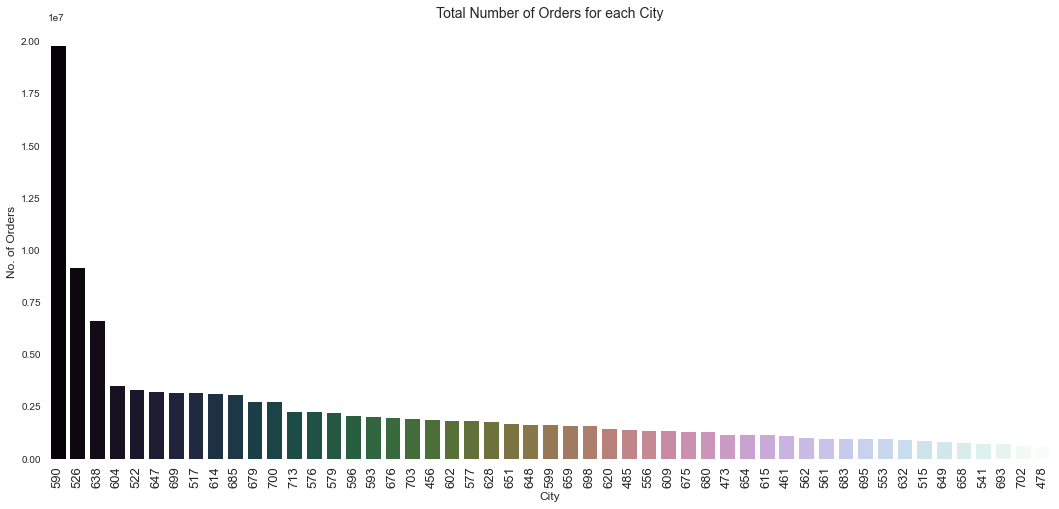

In [47]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=13)
plt.title('Total Number of Orders for each City',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='city_code', data=train.groupby('city_code').num_orders.sum().sort_values(ascending=False).reset_index(),palette="cubehelix",order=list(train.groupby('city_code').num_orders.sum().sort_values(ascending=False).reset_index()['city_code'].values));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('City',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


Also when we checked the number of orders with respect to City, we could see that City - 590 has the highest number of orders - 18.5M orders which is almost 10M orders higher than the City with second highest number of orders - City 526 - 8.6M orders.

<AxesSubplot:>

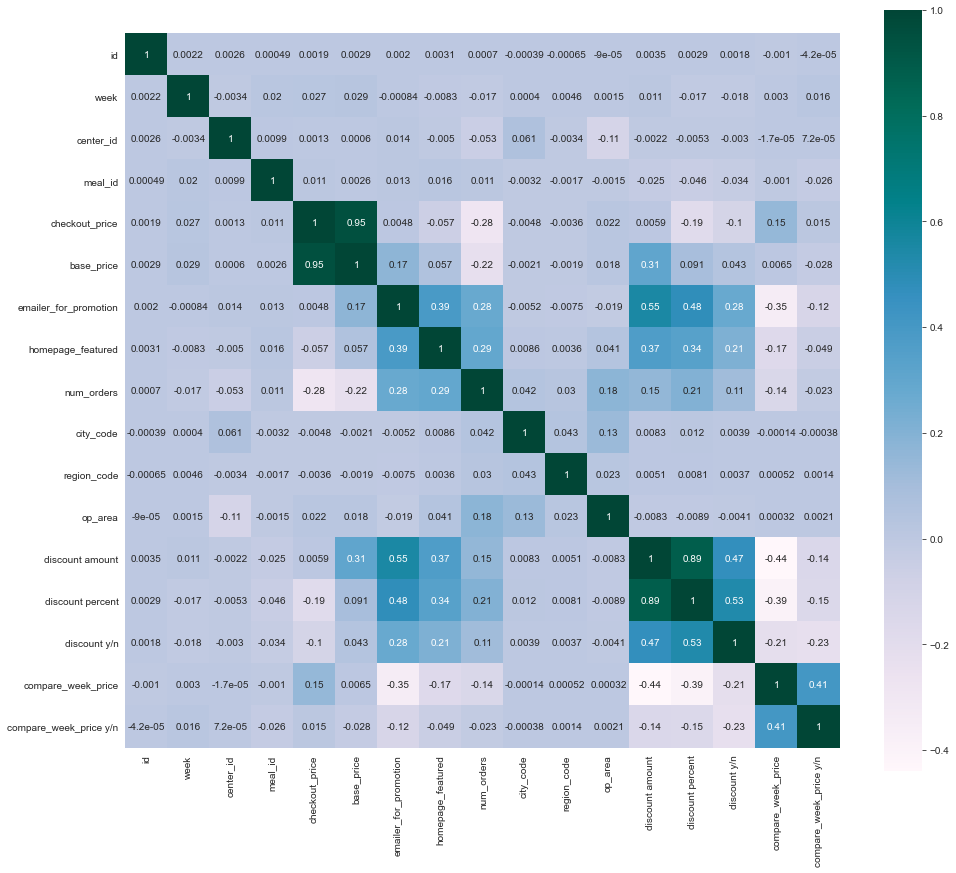

In [48]:
plt.figure(figsize=(16,14))
sns.heatmap(train.corr(),annot=True, square=True, cmap='PuBuGn')

##### Encoding City 

As per our observation from our barchart of the City against the number of orders. There the high significant difference between the Top 3 cities which has the highest number of orders. Therefore, in our first approach we will encode the City with Highest No. of Orders as CH1, City with 2nd Highest No. of Orders as CH2 and City with 3rd Highest No. of Orders as CH3 and rest all of the cities which does not have much significant differences between the number of orders as CH4.

In [49]:
city4={590:'CH1', 526:'CH2', 638:'CH3'}
data['city_enc_4']=data['city_code'].map(city4)
data['city_enc_4']=data['city_enc_4'].fillna('CH4')

In [50]:
data['city_enc_4'].value_counts()

CH4    362341
CH1     58708
CH2     46589
CH3     21483
Name: city_enc_4, dtype: int64

In [51]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount amount,discount percent,discount y/n,compare_week_price,compare_week_price y/n,city_enc_4
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1,0.0,0,CH4
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,-1.00,-0.736214,0,0.0,0,CH4
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.736052,1,0.0,0,CH4
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,98.03,22.405321,1,0.0,0,CH4
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,-1.00,-0.412371,0,0.0,0,CH4


In [52]:
data.isnull().sum()

id                        0
week                      0
center_id                 0
meal_id                   0
checkout_price            0
base_price                0
emailer_for_promotion     0
homepage_featured         0
num_orders                0
city_code                 0
region_code               0
center_type               0
op_area                   0
category                  0
cuisine                   0
discount amount           0
discount percent          0
discount y/n              0
compare_week_price        0
compare_week_price y/n    0
city_enc_4                0
dtype: int64

##### Copying to New DataFrame

In [53]:
datax=data.copy()
datax.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount amount,discount percent,discount y/n,compare_week_price,compare_week_price y/n,city_enc_4
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1,0.0,0,CH4
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,-1.00,-0.736214,0,0.0,0,CH4
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.736052,1,0.0,0,CH4
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,98.03,22.405321,1,0.0,0,CH4
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,-1.00,-0.412371,0,0.0,0,CH4


##### Enoding all the Categorical Features

In [54]:
datax['center_id']=datax['center_id'].astype('object')
datax['meal_id']=datax['meal_id'].astype('object')
datax['region_code']=datax['region_code'].astype('object')

In [55]:
# obj has only the features that num doesn't 
obj=datax[['center_id','meal_id','region_code','center_type','category','cuisine','city_enc_4']]
num=datax.drop(['center_id','meal_id','region_code','center_type','category','cuisine','city_enc_4'],axis=1)

In [56]:
# getting the random values for obj and keeping it under encode1
# each and every unique value in the parent column 
encode1=pd.get_dummies(obj,drop_first = True)

In [57]:
datax=pd.concat([num,encode1],axis=1)

In [58]:
datax.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,discount amount,discount percent,discount y/n,compare_week_price,compare_week_price y/n,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4
0,1379560,1,136.83,152.29,0,0,177,647,2.0,15.46,10.151684,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1466964,1,136.83,135.83,0,0,270,647,2.0,-1.00,-0.736214,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1346989,1,134.86,135.86,0,0,189,647,2.0,1.00,0.736052,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1338232,1,339.50,437.53,0,0,54,647,2.0,98.03,22.405321,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1448490,1,243.50,242.50,0,0,40,647,2.0,-1.00,-0.412371,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [59]:
abs(train.corr()['num_orders']).sort_values(ascending=False)

num_orders                1.000000
homepage_featured         0.294490
checkout_price            0.282108
emailer_for_promotion     0.277147
base_price                0.222306
discount percent          0.205188
op_area                   0.176976
discount amount           0.152950
compare_week_price        0.137849
discount y/n              0.111766
center_id                 0.053035
city_code                 0.041596
region_code               0.029744
compare_week_price y/n    0.022898
week                      0.017210
meal_id                   0.010597
id                        0.000702
Name: num_orders, dtype: float64

##### Linear reg.

Building base model by splitting the last 10 week of the train dataset as test.

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
# could have used train_test_split but did it manually 
# with from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=42) 

train=datax[datax['week'].isin(range(1,136))] #136
test=datax[datax['week'].isin(range(136,146))] #10

# my X_train in comprising of all independent variables, train the model. 
X_train=train.drop(['id','num_orders','week'],axis=1)
# this is my dependent variable which is needed to be predicted
y_train=train['num_orders']

# my X_test is not for the training phase and will used to test and see the accuracy
X_test=test.drop(['id','num_orders','week'],axis=1)
# label which will be used to test the accuracy
y_test=test['num_orders']

reg = LinearRegression()
# removing the common set of sum of absolute residual between the obs target and to be predicted target.
reg.fit(X_train,y_train)

print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred))) #could have commented this but left as we used y_pred
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.49285012192502464
Test Score : 0.506100831531179
R squared : 0.506100831531179
RMSE : 194.38439200373844


In [62]:
Result=pd.DataFrame(y_pred)
# Result=np.expm1(Result).astype('int64')
outputlr = pd.DataFrame(columns=['id', 'num_orders'])
outputlr['id'] = test['id']
outputlr['num_orders'] = Result.values
outputlr.to_csv('C:\\Users\\KIIT\\Desktop\\T&T project DATASET\\Output\\Result Linear.csv', index=False)

##### Linear Model doesn't seems to be yielding much better result. Therefore, proceeding with advanced models 

In [63]:
datay=datax.copy()

In [64]:
datay['Quarter']=(datax['week']/13).astype('int64')

In [65]:
datay['Quarter'] = datay['Quarter'].map({0:'Q1',
                         1:'Q2',
                         2:'Q3',
                         3:'Q4',
                         4:'Q1',
                         5:'Q2',
                         6:'Q3',
                         7:'Q4',
                         8:'Q1',
                         9:'Q2',
                         10:'Q3',
                         11:'Q4'})

In [66]:
datay['Quarter'].value_counts()

Q4    124839
Q3    124225
Q2    122386
Q1    117671
Name: Quarter, dtype: int64

In [67]:
datay['Year']=(datax['week']/52).astype('int64')

In [68]:
datay['Year'] = datay['Year'].map({0:'Y1',
                         1:'Y2',
                         2:'Y3'})

In [69]:
objy=datay[['Quarter', 'Year']]
numy=datay.drop(['Quarter', 'Year'],axis=1)

encode1y=pd.get_dummies(objy,drop_first = True)
encode1y.head()

datay=pd.concat([numy,encode1y],axis=1)

In [70]:
datay.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,discount amount,discount percent,discount y/n,compare_week_price,compare_week_price y/n,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y2,Year_Y3
0,1379560,1,136.83,152.29,0,0,177,647,2.0,15.46,10.151684,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,1466964,1,136.83,135.83,0,0,270,647,2.0,-1.00,-0.736214,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1346989,1,134.86,135.86,0,0,189,647,2.0,1.00,0.736052,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1338232,1,339.50,437.53,0,0,54,647,2.0,98.03,22.405321,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,1448490,1,243.50,242.50,0,0,40,647,2.0,-1.00,-0.412371,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [71]:
conda install -c conda-forge lightgbm

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [72]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score

from lightgbm import LGBMRegressor

##### XGBOOST

In [73]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_test=test['num_orders']

xgb = XGBRegressor(max_depth = 9,   # did it nine but more than that might overfit it, default would have been 6
    learning_rate=0.5,    # how fast my model learns and as we boosted it already we haev to make sure that it doesnt support the overfit.
        silent= 1, 
        objective= 'reg:linear',   # use SSE to inform its fit on a regression problem.
        eval_metric= 'rmse',  # we will be using.
        seed= 4)  #important -deciding factor of my path

xgb.fit(X_train,y_train)
print('Train Score :',xgb.score(X_train,y_train))
print('Test Score :',xgb.score(X_test,y_test))

predictions = xgb.predict(X_test)
print('Explained Variance :',explained_variance_score(predictions,y_test))
print("RMSE :",np.sqrt(mean_squared_error(y_test,predictions)))

[07:19:28] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:19:28] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Train Score : 0.9380886670440328
Test Score : 0.8087793076449632
Explained Variance : 0.7955465553750605
RMSE : 120.95106205655983


In [74]:
Result=pd.DataFrame(predictions)
# Result=np.expm1(Result).astype('int64')
outputxg = pd.DataFrame(columns=['id', 'num_orders'])
outputxg['id'] = test['id']
outputxg['num_orders'] = Result.values
outputxg.to_csv('C:\\Users\\KIIT\\Desktop\\T&T project DATASET\\Output\\Result XGBoost.csv', index=False)

##### LightBoost Regressor

In [75]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2'],axis=1)
y_test=test['num_orders']

LGB=LGBMRegressor(boosting_type='gbdt',
        objective='regression',
        max_depth=9,
        learning_rate = 0.5,
        num_leaves =60,
        feature_fraction = 0.8,
        min_data_in_leaf= 100,
        bagging_fraction= 0.3,
        metric= 'rmse',
        random_state=100,
        seed=4)

LGB.fit(X_train, y_train)
print(f'R^2 score for train:', {LGB.score(X_train, y_train)})
print(f'R^2 score for validation:', {LGB.score(X_test,y_test)})
LGBpred=LGB.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,LGBpred))
print("RMSE :",rmse)

[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
R^2 score for train: {0.8717857914937573}
R^2 score for validation: {0.7855571734503156}
RMSLE : 128.08492093712513


In [76]:
abs(train.corr())[abs(train.corr())>0.5]

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,discount amount,discount percent,discount y/n,compare_week_price,compare_week_price y/n,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y2,Year_Y3
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
week,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.739071
checkout_price,NaN,NaN,1.00000,0.95267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Eliminating the features with multi-collinearity.  might overfit my model

In [77]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_test=test['num_orders']

LGB=LGBMRegressor(boosting_type='gbdt',
        objective='regression',
        max_depth=9,
        learning_rate = 0.5,
        num_leaves =60,
        feature_fraction = 0.8,
        min_data_in_leaf= 100,
        bagging_fraction= 0.3,
        metric= 'rmse',
        random_state=100,
        seed=4)

LGB.fit(X_train, y_train)
print(f'R^2 score for train:', {LGB.score(X_train, y_train)})
print(f'R^2 score for validation:', {LGB.score(X_test,y_test)})
LGBpred=LGB.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,LGBpred))
print("RMSE :",rmse)

[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
R^2 score for train: {0.8647160249520376}
R^2 score for validation: {0.7943158981086172}
RMSLE : 125.44189479794673


In [78]:
Result=pd.DataFrame(LGBpred)
#Result=np.expm1(Result).astype('int64')
outputlb = pd.DataFrame(columns=['id', 'num_orders'])
outputlb['id'] = test['id']
outputlb['num_orders'] = Result.values
outputlb.to_csv('C:\\Users\\KIIT\\Desktop\\T&T project DATASET\\Output\\Result LGBM.csv', index=False)

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<font color=red>We are choosing xgboost. Why?</font>

1. It has a lower Root mean squared error. MSE is used to check how close estimates or forecasts are to actual values. Lower the    MSE, the closer is forecast to actual. This is used as a model evaluation measure for regression models and the lower      value indicates a better fit.
<div>
<img width="380" alt="image" src="https://user-images.githubusercontent.com/84791003/162656563-5f44e3ef-a096-46a5-8fed-f672c4403cfe.png">
</div>
2. It has a higher R2 score, and higher r-squared indicates a better fit for the model
<div>
<img width="380"
            alt="image" src="https://user-images.githubusercontent.com/84791003/162655042-96615f3b-5223-49f5-918f-4058bd6603d4.png">
</div>